In [1]:
import os
import random
import string
from copy import deepcopy
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from numpy.typing import ArrayLike, NDArray
from tqdm import tqdm

In [3]:
rng = np.random.default_rng(seed=1997)

r1_range = (0.8, 2.0)
r2_range, r3_range = [deepcopy(r1_range) for i in range(2)]

d12_range = (4, 8)
d23_range = (4, 8)

a213_range = (0, 2 * np.pi)

r1_vals = rng.uniform(r1_range[0], r1_range[1], 5)
r2_vals = rng.uniform(r2_range[0], r2_range[1], 5)
r3_vals = rng.uniform(r3_range[0], r3_range[1], 5)
d12_vals = rng.uniform(d12_range[0], d12_range[1], 5)
d23_vals = rng.uniform(d23_range[0], d23_range[1], 5)
a213_vals = rng.uniform(a213_range[0], a213_range[1], 5)

r1_mesh, r2_mesh, d12_mesh, d23_mesh, a213_mesh = np.meshgrid(
    r1_vals, r2_vals, d12_vals, d23_vals, a213_vals
)
r1_flat, r2_flat, d12_flat, d23_flat, a213_flat = [
    np.ndarray.flatten(a) for a in (r1_mesh, r2_mesh, d12_mesh, d23_mesh, a213_mesh)
]

In [4]:
max_atom_count = 10
n_systems_per_atom_count = 2

inputs = []
for atom_count in range(2, max_atom_count + 1):
    radii_ranges = [(0.8, 2.0)] * atom_count
    distance_ranges = [(0, 0)] + [
        (max([radii_range[1] for radii_range in radii_ranges]), 12)
    ] * atom_count
    theta_ranges = [(0, 0)] * 2 + [(0, np.pi)] * (atom_count - 2)
    phi_ranges = [(0, 2 * np.pi)] * atom_count

    count = 0
    while count < n_systems_per_atom_count:
        rs, ds, thetas, phis, xs, ys, zs = [], [], [], [], [], [], []

        for i in range(atom_count):
            all_ranges = [radii_ranges, distance_ranges, theta_ranges, phi_ranges]
            r, d, theta, phi = [
                rng.uniform(unique_range[i][0], unique_range[i][1])
                for unique_range in all_ranges
            ]

            rs.append(r)
            ds.append(d)
            thetas.append(theta)
            phis.append(phi)

            x = d * np.sin(theta) * np.cos(phi)
            y = d * np.sin(theta) * np.sin(phi)
            z = d * np.cos(theta)

            xs.append(x)
            ys.append(y)
            zs.append(z)

        for index_pair in combinations(range(atom_count), 2):
            distance = np.sqrt(
                (xs[index_pair[0]] - xs[index_pair[1]]) ** 2
                + (ys[index_pair[0]] - ys[index_pair[1]]) ** 2
                + (zs[index_pair[0]] - zs[index_pair[1]]) ** 2
            )
            sum_of_radii = rs[index_pair[0]] + rs[index_pair[1]]
            if distance < sum_of_radii:
                continue

        input = []
        for arr in [rs, ds, thetas, phis, xs, ys, zs]:
            input.append(np.pad(np.array(arr), (0, max_atom_count - atom_count)))

        input = np.array(input)
        input = np.ndarray.flatten(input)
        assert len(input) == 7 * max_atom_count
        inputs.append(input)
        count += 1

In [16]:
len(inputs)

18

In [5]:
try:
    os.remove("test.xyz")
except:
    pass
new_lines = [f"{max_atom_count}\n\n"]
for i in range(max_atom_count):
    all_ranges = [radii_ranges, distance_ranges, theta_ranges, phi_ranges]
    r, d, theta, phi = (
        rng.uniform(unique_range[i][0], unique_range[i][1])
        for unique_range in all_ranges
    )
    x = d * np.sin(theta) * np.cos(phi)
    y = d * np.sin(theta) * np.sin(phi)
    z = d * np.cos(theta)
    new_lines.append(f"Ar {x} {y} {z}\n")
with open("test.xyz", "w+") as f:
    f.writelines(new_lines)

In [36]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
print(arr)
print(np.shape(arr))
arr = np.reshape(arr, (int(np.shape(arr)[0] / 7), 7))
print(arr)
print(np.shape(arr))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
(14,)
[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]]
(2, 7)


In [41]:
arr = np.array([0, 1, 2, 3, 4, 5])
a, b, c, d, e, f = arr
type(a)

numpy.int64

In [3]:
vals_list = []
xs, ys = ([], [])
count = 0
while count <= 500:
    vals = []
    for val_range in [r1_range, r2_range, r3_range, d12_range, d23_range, a213_range]:
        vals.append(rng.uniform(val_range[0], val_range[1]))
    x = vals[4] * np.cos(vals[5])
    y = vals[4] * np.sin(vals[5])
    if np.sqrt((x - vals[3]) ** 2 + y**2) >= vals[1] + vals[2]:
        xs.append(x)
        ys.append(y)
        vals_list.append(vals)
        count += 1

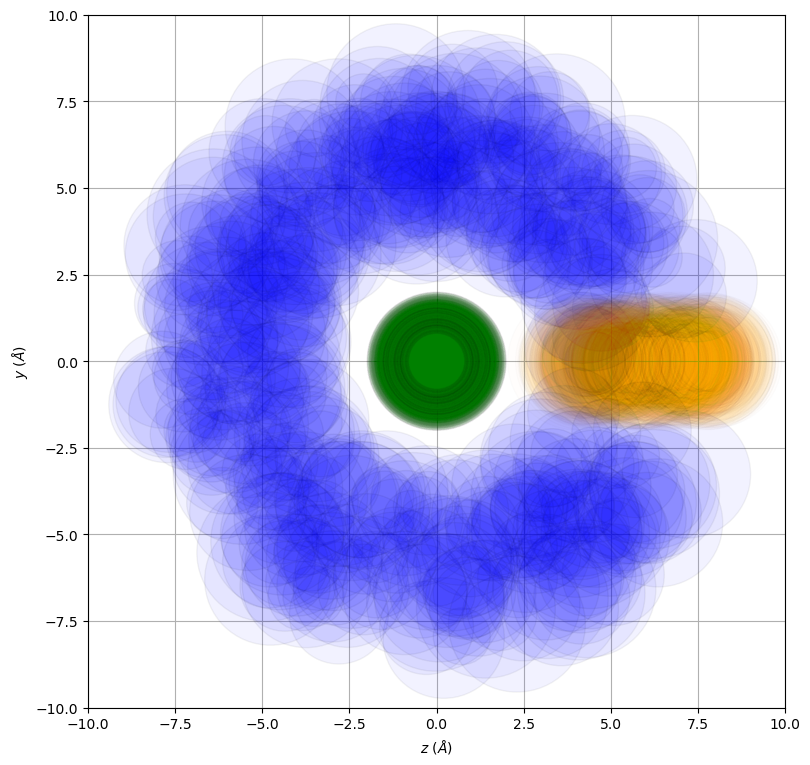

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))

for i, vals in enumerate(vals_list[:]):
    ax.add_patch(
        Circle(
            (xs[i], ys[i]),
            radius=vals[2],
            alpha=0.05,
            facecolor="blue",
            edgecolor="black",
            linewidth=1,
            zorder=5,
        )
    )
    ax.add_patch(
        Circle(
            (0, 0),
            radius=vals[0],
            alpha=0.01,
            facecolor="green",
            edgecolor="black",
            linewidth=1,
            zorder=5,
        )
    )
    ax.add_patch(
        Circle(
            (vals[3], 0),
            radius=vals[1],
            alpha=0.01,
            facecolor="orange",
            edgecolor="black",
            linewidth=1,
            zorder=5,
        )
    )

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

ax.grid(zorder=10)
ax.set_xlabel(r"$z$ ($\AA$)")
ax.set_ylabel(r"$y$ ($\AA$)")

plt.savefig("500_3-atom_systems.png", dpi=300)

fig.show()

In [128]:
ListOfVals = list[float]
ListOfListsOfVals = list[list[float]]


class System:
    """
    A system of atoms.
    """

    def __init__(self, positions=None, radii=None, charges=None) -> None:
        self.positions, self.radii, self.charges = (None, None, None)

        if positions is not None:
            self.set_positions(positions)
        if radii is not None:
            self.set_radii(radii)
        if charges is not None:
            self.set_charges(charges)

        self.id = "".join(random.choices(string.ascii_letters + string.digits, k=16))

    def set_positions(self, positions: ListOfListsOfVals, overwrite=False) -> None:
        if self.positions is not None and not overwrite:
            raise ValueError(
                "self.positions is already set. To overwrite, specify overwrite=True"
            )
        else:
            self.positions = positions

    def set_radii(self, radii: ListOfVals, overwrite=False) -> None:
        if self.radii is not None and not overwrite:
            raise ValueError(
                "self.radii is already set. To overwrite, specify overwrite=True"
            )
        else:
            self.radii = radii

    def set_charges(self, charges: ListOfVals, overwrite=False) -> None:
        if self.charges is not None and not overwrite:
            raise ValueError(
                "self.charges is already set. To overwrite, specify overwrite=True"
            )
        else:
            self.charges = charges

    def check(self) -> None:
        checklist = [
            attribute is None
            for attribute in (self.positions, self.radii, self.charges)
        ]
        if True in checklist:
            empty_attribute = ("positions", "radii", "charges")[checklist.index(True)]
            raise ValueError(f"The attribute self.{empty_attribute} is None")

        checklist = [
            isinstance(attribute, (list, tuple, np.ndarray))
            for attribute in (self.positions, self.radii, self.charges)
        ]
        if False in checklist:
            mistyped_attribute = ("positions", "radii", "charges")[
                checklist.index(False)
            ]
            raise ValueError(
                f"The attribute self.{mistyped_attribute} is not of type list or tuple."
            )

        if not len(self.positions) == len(self.radii) == len(self.charges):
            raise ValueError(
                "The attributes self.positions, self.radii, and self.charges are not"
                " the same length"
                f" ({[len(self.positions), len(self.radii), len(self.charges)]})"
            )

    def get_scale(self) -> float:
        """
        Return the DelPhi `scale` parameter that should be used. Higher values make for
        more accurate but more time/memory hungry calculations. Scales cubically!
        """

        if self.radii is None:
            raise ValueError(
                "At least one radius must be defined to use self.get_scale()"
            )
        count = 0
        for radius in self.radii:
            if radius > 0:
                count += 1
        if count <= 3:
            return 30
        else:
            return 10

    def calculate_born_radius_with_pb(self, atom_index: int) -> float:
        """
        Finds the solvation free energy of the atom with index `atom_index` via PB, then uses the Born equation
        to determine what radius of an ion of the same charge would have to be to recreate the same solvation
        free energy in a system with no other atoms.
        """

        # Step 1: Get the energy of the ion in vacuum (with all other atoms neutral)

        # Step 2: Get the energy of the ion in water (with all other atoms neutral)

        # Step 3: Use the difference in energies (the solvation free energy) in the Born equation

        self.check()
        scale = self.get_scale()

        temp_charges = []
        for i, charge in enumerate(self.charges):
            if i == atom_index:
                temp_charges.append(charge)
            else:
                temp_charges.append(0)

        vacuum_energies = run_pb(
            positions=self.positions,
            radii=self.radii,
            charges=temp_charges,
            focus_atom_index=atom_index,
            cpus=1,
            scale=scale,
            indi=1,
            exdi=1,
        )
        vacuum_energy = convert_energy_to_kJ_per_mol(vacuum_energies["total_grid"])
        # print(f"vacuum_energy: {vacuum_energy} kJ/mol")

        solvated_energies = run_pb(
            positions=self.positions,
            radii=self.radii,
            charges=temp_charges,
            focus_atom_index=atom_index,
            cpus=1,
            scale=scale,
            indi=1,
            exdi=80,
        )
        solvated_energy = convert_energy_to_kJ_per_mol(solvated_energies["total_grid"])
        # print(f"solvated_energy: {solvated_energy} kJ/mol")

        solvation_free_energy = solvated_energy - vacuum_energy
        # print(f"solvation_free_energy: {solvation_free_energy} kJ/mol")

        return born(solvation_free_energy)

    def calculate_born_radius_with_pure_VDW_integral_old(
        self, atom_index: int, scale=None
    ) -> float:
        self.check()
        if not scale:
            scale = self.get_scale()

        # Calcualte the center of mass of the atoms in the system
        # center_of_mass = [
        #     sum([self.positions[j][i] for j in range(len(self.positions))])
        #     / len(self.positions)
        #     for i in range(3)
        # ]
        center = np.array(self.positions[atom_index])

        # Get the diameter of the sphere in which to integrate
        d = np.max(np.linalg.norm(np.array(self.positions) - center, axis=1)) + 1 * max(
            self.radii
        )

        # Create a cube of gridpoints that is larger than the sphere
        X = np.arange(center[0] - d, center[0] + d, 1 / scale)
        Y = np.arange(center[1] - d, center[1] + d, 1 / scale)
        Z = np.arange(center[2] - d, center[2] + d, 1 / scale)
        X, Y, Z = np.meshgrid(X, Y, Z)

        points_in_cube = np.stack((X.flatten(), Y.flatten(), Z.flatten()), axis=1)
        distances = np.linalg.norm(points_in_cube - center, axis=1)
        points_in_sphere = points_in_cube[
            (self.radii[atom_index] < distances) & (distances < d)
        ]

        # Keep a list of gridpoints that are inside the sphere in which to integrate
        # for point in points_in_sphere:
        #     in_solvent = True
        #     # Check if this point is inside an atom
        #     for i, position in enumerate(self.positions):
        #         if get_distance(point, position) < self.radii[i]:
        #             in_solvent = False
        #             break
        #     if in_solvent:
        #         r, theta, phi = convert_to_polar(point, center)
        #         integral += 1 / (4 * np.pi * (r**4))

        integral = np.sum(
            np.all(
                np.linalg.norm(
                    points_in_sphere[:, None, :] - np.array(self.positions), axis=2
                )
                > self.radii,
                axis=1,
            )
            / np.linalg.norm(points_in_sphere - center, axis=1) ** 4
        ) / (4 * np.pi)

        # Calculate the volume of the sphere
        volume = 4 / 3 * np.pi * d**3 - 4 / 3 * np.pi * self.radii[atom_index] ** 3

        # Calculate the integral by getting the average value and multiplying by the volume
        alpha = 1 / (integral * volume / len(points_in_sphere))
        return alpha

    # Written in full by ChatGPT-4o 6/8/2024
    def calculate_born_radius_with_pure_VDW_integral(
        self, atom_index: int, scale=None, chunk_size=1000000
    ) -> float:
        """
        Take a cube containing all atoms. Then, for all gridpoints inside of the sphere circumscribed in the cube,
        use those grid points to calculate an integral dependent on whether a gridpoint is inside an atom or in solvent.
        """
        self.check()
        if not scale:
            scale = self.get_scale()

        center = np.array(self.positions[atom_index])

        # Get the diameter of the sphere in which to integrate
        d = np.max(np.linalg.norm(np.array(self.positions) - center, axis=1)) + 1 * max(
            self.radii
        )

        # Create ranges for gridpoints that are larger than the sphere
        X_range = np.arange(center[0] - d, center[0] + d, 1 / scale)
        Y_range = np.arange(center[1] - d, center[1] + d, 1 / scale)
        Z_range = np.arange(center[2] - d, center[2] + d, 1 / scale)

        def chunk_generator():
            chunk = []
            for x in X_range:
                for y in Y_range:
                    for z in Z_range:
                        point = np.array([x, y, z])
                        distance = np.linalg.norm(point - center)

                        # Check if the gridpoint is outside the focus atom but inside the sphere
                        if self.radii[atom_index] < distance < d:
                            chunk.append((point, distance))
                            if len(chunk) >= chunk_size:
                                yield chunk
                                chunk = []
            if chunk:
                yield chunk

        integral = 0.0
        num_points_in_sphere = 0
        for chunk in chunk_generator():
            points = np.array([item[0] for item in chunk])
            num_points_in_sphere += len(points)
            distances = np.array([item[1] for item in chunk])
            point_distances = np.linalg.norm(
                points[:, None, :] - np.array(self.positions), axis=2
            )
            valid_points = np.all(point_distances > self.radii, axis=1)
            integral += np.sum(1 / distances[valid_points] ** 4)

        integral /= 4 * np.pi

        # Calculate the volume of the sphere
        volume = 4 / 3 * np.pi * d**3 - 4 / 3 * np.pi * self.radii[atom_index] ** 3

        # Calculate the integral by getting the average value and multiplying by the volume
        alpha = 1 / (integral * volume / num_points_in_sphere)
        return alpha

    def get_points_on_atom_surface(
        self, atom_index: int, desired_point_density=1000
    ) -> (NDArray, int):
        """
        Return a tuple of: numpy array of xyz coordiantes of points uniformly randomly distributed
        on the surface of the sphere of atom with index `atom_index` and the number of points.
        """

        r = self.radii[atom_index]
        num_points = int(desired_point_density * 4 * np.pi * r**2)
        rng = np.random.default_rng(seed=1997)

        theta = np.arccos(2 * rng.uniform(low=0, high=1, size=num_points) - 1)
        phi = rng.uniform(low=0, high=2 * np.pi, size=num_points)
        xs = r * np.sin(theta) * np.cos(phi)
        ys = r * np.sin(theta) * np.sin(phi)
        zs = r * np.cos(theta)

        return (
            np.array([[xs[i], ys[i], zs[i]] for i in range(0, num_points)]),
            np.array([[theta[i], phi[i]] for i in range(0, num_points)]),
            num_points,
        )

    # CHEAPER BUT WRONG. HAVEN'T FIXED!! DANGER!!
    # def get_fraction_surface_points_shadowed(
    #     self, atom_index: int, desired_point_density=1000
    # ) -> float:
    #     surface_points, num_points = self.get_points_on_atom_surface(
    #         atom_index, desired_point_density
    #     )
    #     center_point = np.array(self.positions[atom_index])

    #     # Get vectors from center of atom of interest to the points on its surface
    #     surface_vecs = surface_points - center_point
    #     # surface_mags = np.linalg.norm(surface_vecs, axis=1)
    #     surface_mags = np.array(
    #         [float(self.radii[atom_index]) for _ in range(num_points)]
    #     )

    #     # Get vectors from center of atom of interest to the centers of peripheral atoms
    #     peripheral_atom_vecs = np.array(self.positions) - center_point
    #     peripheral_atom_mags = np.linalg.norm(peripheral_atom_vecs, axis=1)

    #     num_points_intersecting = 0
    #     for i, surface_vec in enumerate(surface_vecs):
    #         for j, peripheral_atom_vec in enumerate(peripheral_atom_vecs):
    #             if j == atom_index:
    #                 continue
    #             dot_product = np.dot(surface_vec, peripheral_atom_vec)
    #             theta = np.arccos(
    #                 dot_product / (surface_mags[i] * peripheral_atom_mags[j])
    #             )
    #             if theta <= np.pi/2 and abs(peripheral_atom_mags[j] * np.sin(theta)) <= self.radii[j]:
    #                 num_points_intersecting += 1
    #                 break

    #     return num_points_intersecting / num_points

    def get_fraction_surface_points_shadowed(
        self,
        atom_index: int,
        surface_point_data: tuple[NDArray, int],
    ) -> float:
        surface_points, surface_points_spherical, num_points = surface_point_data

        center_point = np.array(self.positions[atom_index])

        # Get vectors from center of atom of interest to the points on its surface
        surface_vecs = surface_points - center_point
        # surface_mags = np.linalg.norm(surface_vecs, axis=1)
        surface_mags = np.array(
            [float(self.radii[atom_index]) for _ in range(num_points)]
        )

        # Get vectors from center of atom of interest to the centers of peripheral atoms
        peripheral_atom_vecs = np.array(self.positions) - center_point
        peripheral_atom_mags = np.linalg.norm(peripheral_atom_vecs, axis=1)

        delta = 0.01
        intersection_array = []
        for i, surface_vec in enumerate(surface_vecs):
            intersection_lengths = [0 for _ in peripheral_atom_vecs]
            current_pos = surface_vec
            while np.linalg.norm(current_pos - center_point) <= 3:
                current_pos = current_pos + (surface_vec * delta)
                for j, peripheral_atom_vec in enumerate(peripheral_atom_vecs):
                    if j == atom_index:
                        continue
                    if (
                        np.linalg.norm(current_pos - peripheral_atom_vec)
                        < self.radii[j]
                    ):
                        # Calculate length of intersection path inside peripheral atom
                        # "peripheral internal vector" means the vector going from point of
                        # intersection of peripheral atom to that atom's center
                        peripheral_internal_vec = peripheral_atom_vec - current_pos
                        assert (
                            abs(np.linalg.norm(peripheral_internal_vec) - self.radii[j])
                            <= delta
                        )
                        phi = np.arccos(
                            np.dot(surface_vec, peripheral_internal_vec)
                            / (surface_mags[i] * self.radii[j])
                        )
                        theta = 2 * phi - np.pi
                        length_of_intersection_path = np.sqrt(
                            2 * self.radii[j] ** 2
                            - 2 * np.cos(theta) * self.radii[j] ** 2
                        )
                        intersection_lengths[j] += length_of_intersection_path
                        # We already counted length due to this peripheral atom; teleport to the opposite edge
                        # of the atom to continue the ray tracing and count other lengths
                        current_pos = (
                            current_pos
                            + (length_of_intersection_path + 2 * delta) * surface_vec
                        )

            intersection_array.append(max(intersection_lengths))

        print(len(intersection_array), num_points)
        assert len(intersection_array) == num_points
        num_points_intersecting = sum([1 if v != 0 else 0 for v in intersection_array])
        return (num_points_intersecting / num_points, intersection_array)

    def get_surface_points_KL(
        self,
        atom_index: int,
        surface_point_data: tuple[NDArray, int],
        intersection_array: list[bool],
    ) -> float:
        intersection_array = np.array(intersection_array)
        surface_points, surface_points_spherical, num_points = surface_point_data
        rng = np.random.default_rng(seed=1997)
        KLs = []
        for _ in range(100):
            uniform_random_reference = rng.permutation(intersection_array)
            KL = np.sum(
                (intersection_array + 1)
                * np.log((intersection_array + 1) / (uniform_random_reference + 1))
            )
            KLs.append(KL)
        return KLs


def get_surface_point_info(
    system: System, atom_index: int, desired_point_density=1000
) -> tuple:
    surface_point_data = system.get_points_on_atom_surface(
        atom_index, desired_point_density
    )
    fraction_shadowed, intersection_array = system.get_fraction_surface_points_shadowed(
        atom_index, surface_point_data
    )
    KLs = system.get_surface_points_KL(
        atom_index, surface_point_data, intersection_array
    )
    return surface_point_data, intersection_array, KLs


def get_born_radii(system: System) -> tuple:
    BR_pb = system.calculate_born_radius_with_pb(0)
    BR_pure_VDW = system.calculate_born_radius_with_pure_VDW_integral(0)
    return (BR_pb, BR_pure_VDW)

In [129]:
test_system = System()
test_system.set_radii([1, 1, 1])
test_system.set_charges([1, 1, 1])
test_system.set_positions([[0, 0, 0], [0, 2, 0], [0, -2, 0]])

surface_point_data, intersection_array, KLs = get_surface_point_info(
    test_system, 0, 1000
)

# print(intersection_array)

12566 12566


In [60]:
max(intersection_array), min(intersection_array)

(1.9796047153380032, 0)

In [125]:
print(sum(KLs) / len(KLs), np.std(KLs))

9336.793602804337 86.45861091587683


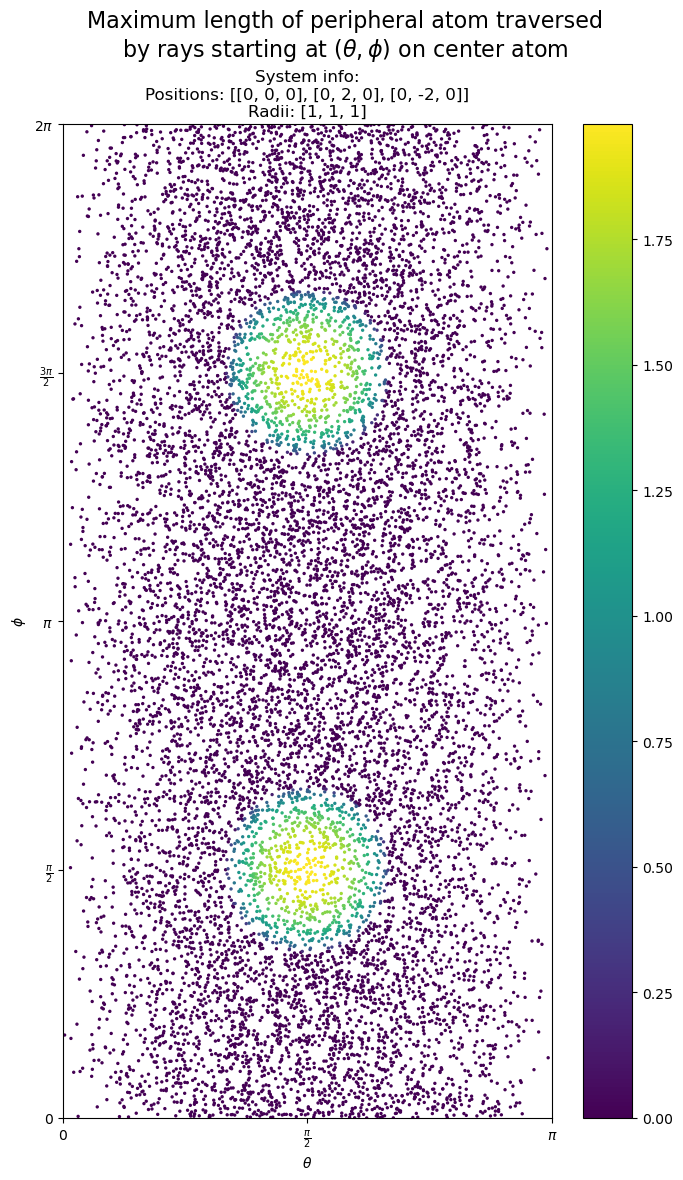

In [90]:
surface_points, surface_points_spherical, num_points = surface_point_data

fig = plt.figure(figsize=(7, 12))

plt.scatter(
    [v[0] for v in surface_points_spherical],
    [v[1] for v in surface_points_spherical],
    s=2,
    c=intersection_array,
    cmap="viridis",
)

plt.colorbar(ticks=np.arange(0, 2.25, 0.25))
plt.xlim(0, np.pi)
plt.ylim(0, 2 * np.pi)
plt.xticks(
    np.arange(0, np.pi + np.pi / 2, np.pi / 2),
    labels=["0", r"$\frac{\pi}{2}$", r"$\pi$"],
)
plt.yticks(
    np.arange(0, 2 * np.pi + np.pi / 2, np.pi / 2),
    labels=["0", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"],
)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\phi$")
plt.suptitle(
    "Maximum length of peripheral atom traversed\n"
    + r"by rays starting at $(\theta,\phi)$ on center atom",
    fontsize=16,
)
plt.title(
    f"System info:\nPositions: {test_system.positions}\nRadii: {test_system.radii}",
    fontsize=12,
    loc="center",
)
plt.tight_layout()
plt.savefig("example_datamap.png")
fig.show()

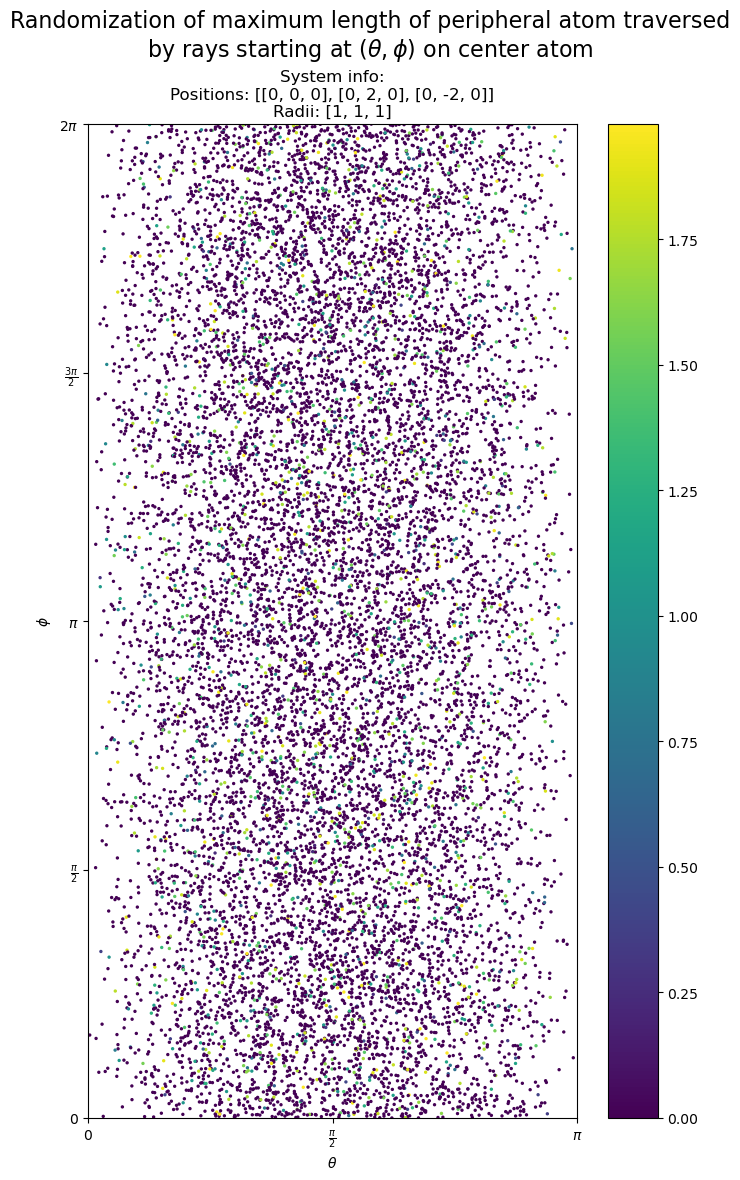

In [94]:
surface_points, surface_points_spherical, num_points = surface_point_data

fig = plt.figure(figsize=(7, 12))

rng = np.random.default_rng(seed=1997)
plt.scatter(
    [v[0] for v in surface_points_spherical],
    [v[1] for v in surface_points_spherical],
    s=2,
    c=rng.permutation(intersection_array),
    cmap="viridis",
)

plt.colorbar(ticks=np.arange(0, 2.25, 0.25))
plt.xlim(0, np.pi)
plt.ylim(0, 2 * np.pi)
plt.xticks(
    np.arange(0, np.pi + np.pi / 2, np.pi / 2),
    labels=["0", r"$\frac{\pi}{2}$", r"$\pi$"],
)
plt.yticks(
    np.arange(0, 2 * np.pi + np.pi / 2, np.pi / 2),
    labels=["0", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"],
)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\phi$")
plt.suptitle(
    "Randomization of maximum length of peripheral atom traversed\n"
    + r"by rays starting at $(\theta,\phi)$ on center atom",
    fontsize=16,
)
plt.title(
    f"System info:\nPositions: {test_system.positions}\nRadii: {test_system.radii}",
    fontsize=12,
    loc="center",
)
plt.tight_layout()
plt.savefig("randomized_datamap.png")
fig.show()

In [192]:
from scipy.spatial import distance_matrix

dm = distance_matrix(b, b)

Point density = 99.95 points per square Angstrom
Number of points = 1256


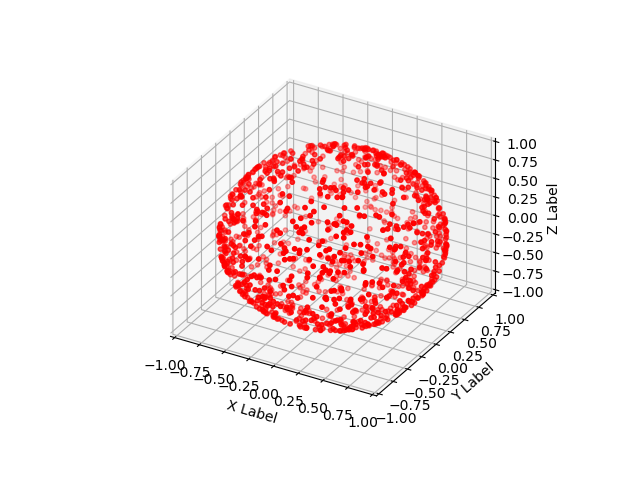

In [51]:
theta_range = (0, np.pi)
phi_range = (0, 2 * np.pi)
r = 1
desired_point_density = 100
num_points = int(desired_point_density * 4 * np.pi * r**2)
rng = np.random.default_rng(seed=1997)

theta = np.arccos(2 * rng.uniform(low=0, high=1, size=num_points) - 1)
phi = rng.uniform(low=0, high=2 * np.pi, size=num_points)
xs = r * np.sin(theta) * np.cos(phi)
ys = r * np.sin(theta) * np.sin(phi)
zs = r * np.cos(theta)

print(f"Point density = {num_points/(4*np.pi*r**2):0.2f} points per square Angstrom")
print(f"Number of points = {num_points}")

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs, ys, zs, c="r", marker="o", s=10)

ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")

ax.axes.set_xlim3d(-1, 1)
ax.axes.set_ylim3d(-1, 1)
ax.axes.set_zlim3d(-1, 1)

ax.set_proj_type("ortho")

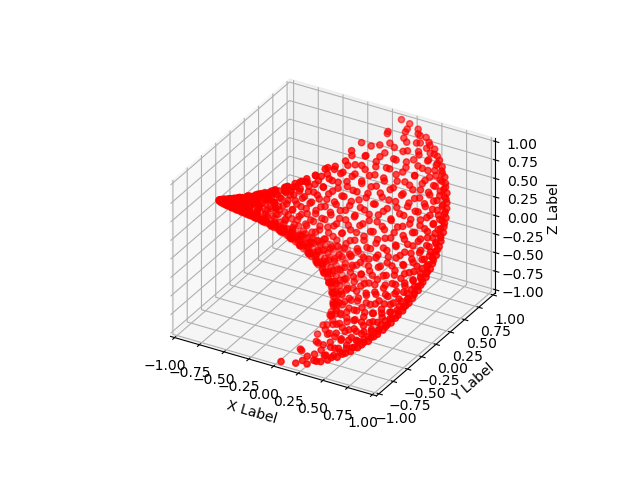

In [32]:
num_pts = 1000
indices = np.arange(0, num_pts, dtype=float) + 0.5

phi = np.arccos(1 - 2 * indices / num_pts)
theta = np.pi * (1 + 5**0.5) * indices

xs, ys, zs = (
    r * np.sin(theta) * np.sin(phi),
    r * np.sin(theta) * np.cos(phi),
    np.cos(phi),
)

# creating figure
# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs, ys, zs, c="r", marker="o")

ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")

ax.axes.set_xlim3d(-1, 1)
ax.axes.set_ylim3d(-1, 1)
ax.axes.set_zlim3d(-1, 1)

ax.set_proj_type("ortho")

# displaying the plot